In [3]:
import pandas as pd 
import numpy as np 

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [4]:
random_state = 2

def dataPreprocessing():
    # Loading dataset
    penguins_data = pd.read_csv('static/penguins.csv')
    # Preprocess
    penguins_data.dropna(inplace=True)
    penguins_data.drop(penguins_data.index[penguins_data['sex'] == '.'].tolist(),inplace=True)
    penguins_data['species']=penguins_data['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
    penguins_data.reset_index(inplace=True)
    penguins_data.drop('index', axis=1, inplace=True)
    df_male = pd.get_dummies(data=penguins_data['sex'], drop_first=True)
    penguins_data = pd.concat([penguins_data,df_male], axis=1)
    df_island = pd.get_dummies(data=penguins_data['island'])
    penguins_data = pd.concat([penguins_data,df_island], axis=1)
    pgn = penguins_data.drop(['island','sex'], axis=1)
    
    X = pgn.drop('species', axis=1)
    y = pgn['species']

    # Normalization
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)
    return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = train_test_split(*load_iris(return_X_y=True), test_size=.7, random_state=random_state)
X_train, X_test, y_train, y_test = dataPreprocessing()

Penguins Accuracy: 0.9552238805970149
Tree depth: 5
Decision tree:



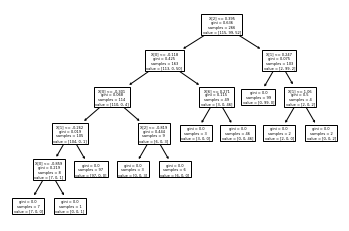

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

tree_depth = clf.get_depth()

# print("Iris Accuracy:",accuracy_score(y_test, predictions))
print("Penguins Accuracy:",accuracy_score(y_test, predictions))
print("Tree depth:", tree_depth)
print("Decision tree:\n")
tree.plot_tree(clf)
plt.show()